# import

In [1]:
import numpy as np
from scipy import stats #高度な科学技術計算を行うためのモジュール
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from IPython.display import display, HTML # 画像表示などを行うためのモジュール
%matplotlib inline

# X-meansを行うクラスの定義

In [2]:
class XMeans:
    """
    x-means法を行うクラス
    """

    def __init__(self, k_init = 2, **k_means_args):
        """
        k_init : The initial number of clusters applied to KMeans()
        """
        self.k_init = k_init
        self.k_means_args = k_means_args

    def fit(self, X):
        """
        x-means法を使ってデータXをクラスタリングする
        X : array-like or sparse matrix, shape=(n_samples, n_features)
        """
        self.__clusters = [] #clustersにはもうこれ以上分割しないデータが格納される

        clusters = self.Cluster.build(X, KMeans(self.k_init, **self.k_means_args).fit(X))
        self.__recursively_split(clusters)

        self.labels_ = np.empty(X.shape[0], dtype = np.intp)
        for i, c in enumerate(self.__clusters):
            self.labels_[c.index] = i

        self.cluster_centers_ = np.array([c.center for c in self.__clusters])
        self.cluster_log_likelihoods_ = np.array([c.log_likelihood() for c in self.__clusters])
        self.cluster_sizes_ = np.array([c.size for c in self.__clusters])

        return self

    def __recursively_split(self, clusters):
        """
        引数のclustersを再帰的に分割する
        clusters : list-like object, which contains instances of 'XMeans.Cluster'
        'XMeans.Cluster'のインスタンスを含むリスト型オブジェクト
        """
        for cluster in clusters:
            if cluster.size <= 3:
                self.__clusters.append(cluster) #仮説：クラスタに含まれるデータの個数が3個以内の場合はこれ以上分割しない
                continue #cluster.size<=3だったら次のループへいく。そうではなかったら次の処理へ進む

            k_means = KMeans(2, **self.k_means_args).fit(cluster.data)
            c1, c2 = self.Cluster.build(cluster.data, k_means, cluster.index)

            beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(np.linalg.det(c1.cov) + np.linalg.det(c2.cov))
            alpha = 0.5 / stats.norm.cdf(beta)
            bic = -2 * (cluster.size * np.log(alpha) + c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)

            if bic < cluster.bic():
                self.__recursively_split([c1, c2])　#更なる分割を行う
            else:
                self.__clusters.append(cluster) #これ以上分割しない

    class Cluster:
        """
        k-means法によって生成されたクラスタに関する情報を持ち、尤度やBICの計算を行うクラス
        """

        @classmethod
        def build(cls, X, k_means, index = None): 
            if index is None:
                index = np.array(range(0, X.shape[0]))
            labels = range(0, k_means.get_params()["n_clusters"])  

            return tuple(cls(X, index, k_means, label) for label in labels) #ここでクラスター結果を入れたインスタンスを生成し、クラスタ数分の「インスタンスを返す
        

        # index: Xの各行におけるサンプルが元データの何行目のものかを示すベクトル
        def __init__(self, X, index, k_means, label):
            self.data = X[k_means.labels_ == label]
            self.index = index[k_means.labels_ == label]
            self.size = self.data.shape[0]
            self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
            self.center = k_means.cluster_centers_[label]
            self.cov = np.cov(self.data.T)

        def log_likelihood(self):
            return sum(stats.multivariate_normal.logpdf(x, self.center, self.cov) for x in self.data)

        def bic(self):
            return -2 * self.log_likelihood() + self.df * np.log(self.size)

In [101]:
class Cluster:
    """
    k-means法によって生成されたクラスタに関する情報を持ち、尤度やBICの計算を行うクラス
    """

    @classmethod
    def build(cls, X, k_means, index = None): 
        if index is None:
            index = np.array(range(0, X.shape[0]))
        labels = range(0, k_means.get_params()["n_clusters"])  

        return tuple(cls(X, index, k_means, label) for label in labels) 
    

    # index: Xの各行におけるサンプルが元データの何行目のものかを示すベクトル
    def __init__(self, X, index, k_means, label):
        self.data = X[k_means.labels_ == label]
        self.index = index[k_means.labels_ == label]
        self.size = self.data.shape[0]
        self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
        self.center = k_means.cluster_centers_[label]
        self.cov = np.cov(self.data.T)
    
    def log_likelihood(self):
        return sum(stats.multivariate_normal.logpdf(x, self.center, self.cov) for x in self.data)

    def bic(self):
        return -2 * self.log_likelihood() + self.df * np.log(self.size)

In [103]:
clusters = Cluster.build(X, KMeans(n_clusters=2, random_state=1).fit(X))
__recursively_split(clusters)

In [105]:
__clusters

[(<__main__.Cluster at 0x1f21033d160>, <__main__.Cluster at 0x1f2158528b0>),

In [80]:
for cluster in clusters:
    if cluster.size <= 3:
        self.__clusters.append(cluster) #仮説：クラスタに含まれるデータの個数が3個以内の場合はこれ以上分割しない
        continue

        k_means = KMeans(2, **self.k_means_args).fit(cluster.data)
        c1, c2 = self.Cluster.build(cluster.data, k_means, cluster.index)

        beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(np.linalg.det(c1.cov) + np.linalg.det(c2.cov))
        alpha = 0.5 / stats.norm.cdf(beta)
        bic = -2 * (cluster.size * np.log(alpha) + c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)

        if bic < cluster.bic():
            self.__recursively_split([c1, c2])
            else:
                self.__clusters.append(cluster)


In [102]:
#仮説：
#buildでタプルにまとめられたクラスを出力する
#__recursively_splitでクラスを出力し、かつそれはリストの要素一つがクラスの形にする




def __recursively_split(clusters):
        """
        引数のclustersを再帰的に分割する
        clusters : list-like object, which contains instances of 'XMeans.Cluster'
        'XMeans.Cluster'のインスタンスを含むリスト型オブジェクト
        """
        for cluster in clusters:
            if cluster.size <= 3:
                __clusters.append(cluster) #仮説：クラスタに含まれるデータの個数が3個以内の場合はこれ以上分割しない
                continue #cluster.size<=3だったら次のループへいく。そうではなかったら次の処理へ進む

            k_means = KMeans(2, random_state=1).fit(cluster.data)
            c1, c2 = Cluster.build(cluster.data, k_means, cluster.index)

            beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(np.linalg.det(c1.cov) + np.linalg.det(c2.cov))
            alpha = 0.5 / stats.norm.cdf(beta)
            bic = -2 * (cluster.size * np.log(alpha) + c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)

            if bic < cluster.bic():
                __recursively_split([c1, c2]) #更なる分割を行う
            else:
                __clusters.append(cluster) #これ以上分割しない

# X-meansを実行

## 重心が十分離れているパターン

No handles with labels found to put in legend.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[[1.02916941 1.03188116]
 [1.99764092 1.01396669]
 [1.02899803 1.99552327]
 [1.99716769 2.00985178]]
[41.33722116 37.44827862 43.43529633 42.11015951]
[20 20 20 20]


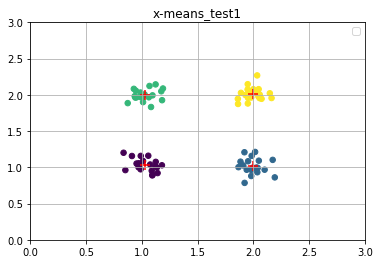

In [106]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # データの準備
    x = np.array([np.random.normal(loc, 0.1, 20) for loc in np.repeat([1,2], 2)]).flatten() #ランダムな80個の数を生成
    y = np.array([np.random.normal(loc, 0.1, 20) for loc in np.tile([1,2], 2)]).flatten() #ランダムな80個の数を生成
        #np.repeat([1, 2], 2)の出力結果は1,1,2,2
        #np.tile([1, 2], 2)の出力結果は1,2,1,2
        #np.random.normal(平均, 標準偏差, 出力配列のサイズ)        
    
    # クラスタリングの実行
    x_means = XMeans(random_state = 1).fit(np.c_[x,y])  
    print(x_means.labels_)
    print(x_means.cluster_centers_)
    print(x_means.cluster_log_likelihoods_)
    print(x_means.cluster_sizes_)

    # 結果をプロット
    plt.rcParams["font.family"] = "Hiragino Kaku Gothic Pro"
    plt.scatter(x, y, c = x_means.labels_, s = 30)
    plt.scatter(x_means.cluster_centers_[:,0], x_means.cluster_centers_[:,1], c = "r", marker = "+", s = 100)
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.title("x-means_test1")
    plt.legend()
    plt.grid()
    plt.show()

In [107]:
class Cluster:
        """
        k-means法によって生成されたクラスタに関する情報を持ち、尤度やBICの計算を行うクラス
        """

        @classmethod
        def build(cls, X, k_means, index = None): 
            if index is None:
                index = np.array(range(0, X.shape[0]))
            labels = range(0, k_means.get_params()["n_clusters"])  

            return tuple(cls(X, index, k_means, label) for label in labels) 

        # index: Xの各行におけるサンプルが元データの何行目のものかを示すベクトル
        def __init__(self, X, index, k_means, label):
            self.data = X[k_means.labels_ == label]
            self.index = index[k_means.labels_ == label]
            self.size = self.data.shape[0]
            self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
            self.center = k_means.cluster_centers_[label]
            self.cov = np.cov(self.data.T)

        def log_likelihood(self):
            return sum(stats.multivariate_normal.logpdf(x, self.center, self.cov) for x in self.data)

        def bic(self):
            return -2 * self.log_likelihood() + self.df * np.log(self.size)

In [7]:
clusters = Cluster.build(np.c_[x,y], KMeans(n_clusters=2, random_state=1).fit(np.c_[x,y]))

In [15]:
Y = np.c_[x,y]
Y.shape[0]

80

In [16]:
np.array(range(0, Y.shape[0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

## クラスタ数が多いパターン(クラスタ数=100)

No handles with labels found to put in legend.


[ 0  0  0 ... 19 19 19]
[[ 1.00087871  1.00014601]
 [ 1.00003522  2.0033094 ]
 [ 2.00245071  3.00285236]
 [ 2.00227528  4.00863401]
 [ 2.99423642  4.98460187]
 [ 2.99055263  5.99688333]
 [ 5.99383562  0.99138028]
 [ 6.00003894  2.00101898]
 [ 7.00820748  2.99662629]
 [ 6.99590232  3.99661228]
 [ 4.01437214  6.99682931]
 [ 4.01590487  8.00511829]
 [ 4.99153043  8.99856182]
 [ 4.99324773 10.01151743]
 [ 8.00628055  5.00659463]
 [ 7.99056372  5.99498081]
 [ 9.00408455  6.99569968]
 [ 8.99978666  7.99204096]
 [ 9.9967045   8.99147939]
 [10.00810469  9.99765946]]
[341.72950263 354.52866344 351.58400385 375.23048036 359.79438869
 355.77230982 378.83426661 377.09955465 353.42978105 340.64673953
 352.05786034 348.35100198 374.67606042 367.2432809  374.37770163
 344.18856529 341.92642953 373.4108847  355.35383285 333.54817916]
[200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200]


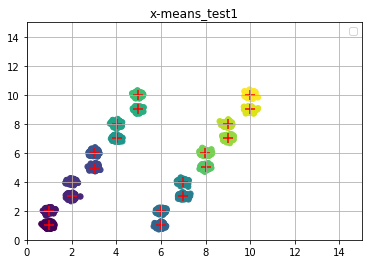

In [128]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # データの準備
    x = np.array([np.random.normal(loc, 0.1, 200) for loc in np.repeat(range(1,11,1), 2)]).flatten() #ランダムな2000個の数を生成
    y = np.array([np.random.normal(loc, 0.1, 200) for loc in np.tile(range(1,11,1), 2)]).flatten() #ランダムな2000個の数を生成
        #np.repeat([1, 2], 2)の出力結果は1,1,2,2
        #np.tile([1, 2], 2)の出力結果は1,2,1,2
        #np.random.normal(平均, 標準偏差, 出力配列のサイズ)      
        #flattenは多次元配列を1次元に直すメソッド

        
    # クラスタリングの実行
    x_means = XMeans(random_state = 1).fit(np.c_[x,y])  
    print(x_means.labels_)
    print(x_means.cluster_centers_)
    print(x_means.cluster_log_likelihoods_)
    print(x_means.cluster_sizes_)

    # 結果をプロット
    plt.rcParams["font.family"] = "Hiragino Kaku Gothic Pro"
    plt.scatter(x, y, c = x_means.labels_, s = 30)
    plt.scatter(x_means.cluster_centers_[:,0], x_means.cluster_centers_[:,1], c = "r", marker = "+", s = 100)
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.title("x-means_test1")
    plt.legend()
    plt.grid()
    plt.show()

# クラスタが近いパターン

No handles with labels found to put in legend.


[1 0 1 ... 1 0 1]
[[0.53092979 0.76602897]
 [1.91161861 1.71421202]]
[-2329.75836966 -2370.40292609]
[ 996 1004]


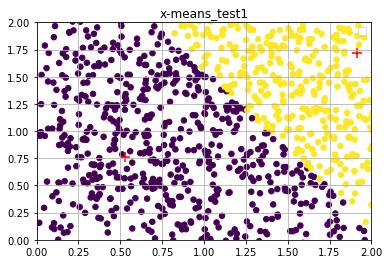

In [135]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # データの準備
    x = np.array([np.random.normal(loc, 1, 500) for loc in np.repeat([1, 1.5], 2)]).flatten() #ランダムな2000個の数を生成
    y = np.array([np.random.normal(loc, 1, 500) for loc in np.tile([1, 1.5], 2)]).flatten() #ランダムな2000個の数を生成
        #np.repeat([1, 2], 2)の出力結果は1,1,2,2
        #np.tile([1, 2], 2)の出力結果は1,2,1,2
        #np.random.normal(平均, 標準偏差, 出力配列のサイズ)      
        #flattenは多次元配列を1次元に直すメソッド

        
    # クラスタリングの実行
    x_means = XMeans(random_state = 1).fit(np.c_[x,y])  
    print(x_means.labels_)
    print(x_means.cluster_centers_)
    print(x_means.cluster_log_likelihoods_)
    print(x_means.cluster_sizes_)

    # 結果をプロット
    plt.rcParams["font.family"] = "Hiragino Kaku Gothic Pro"
    plt.scatter(x, y, c = x_means.labels_, s = 30)
    plt.scatter(x_means.cluster_centers_[:,0], x_means.cluster_centers_[:,1], c = "r", marker = "+", s = 100)
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.title("x-means_test1")
    plt.legend()
    plt.grid()
    plt.show()

In [134]:
print(np.repeat([1, 1.5], 2))
print(np.tile([1, 1.5], 2))

[1.  1.  1.5 1.5]
[1.  1.5 1.  1.5]
